In [1]:
import librosa
from librosa.display import specshow
import numpy as np
from keras.models import Sequential
from kapre.time_frequency import Melspectrogram
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
src = librosa.load('./sound_files/test.wav',sr=12000)[0]# Son 1000 + 400 Hz

In [3]:
# Mel-spectro de Kapre

kapre_model = Sequential()
kapre_model.add(Melspectrogram(input_shape = (1,src.shape[0]),n_mels=96,return_decibel_melgram=True,n_dft=512, n_hop=256, power_melgram=2.0))
kapre_mel = kapre_model.predict(src[np.newaxis,np.newaxis,:])[0,:,:,0]


# Mel-spectro de librosa :

librosa_mel = librosa.feature.melspectrogram(src, sr=12000,n_mels=96,n_fft=512,hop_length=256)

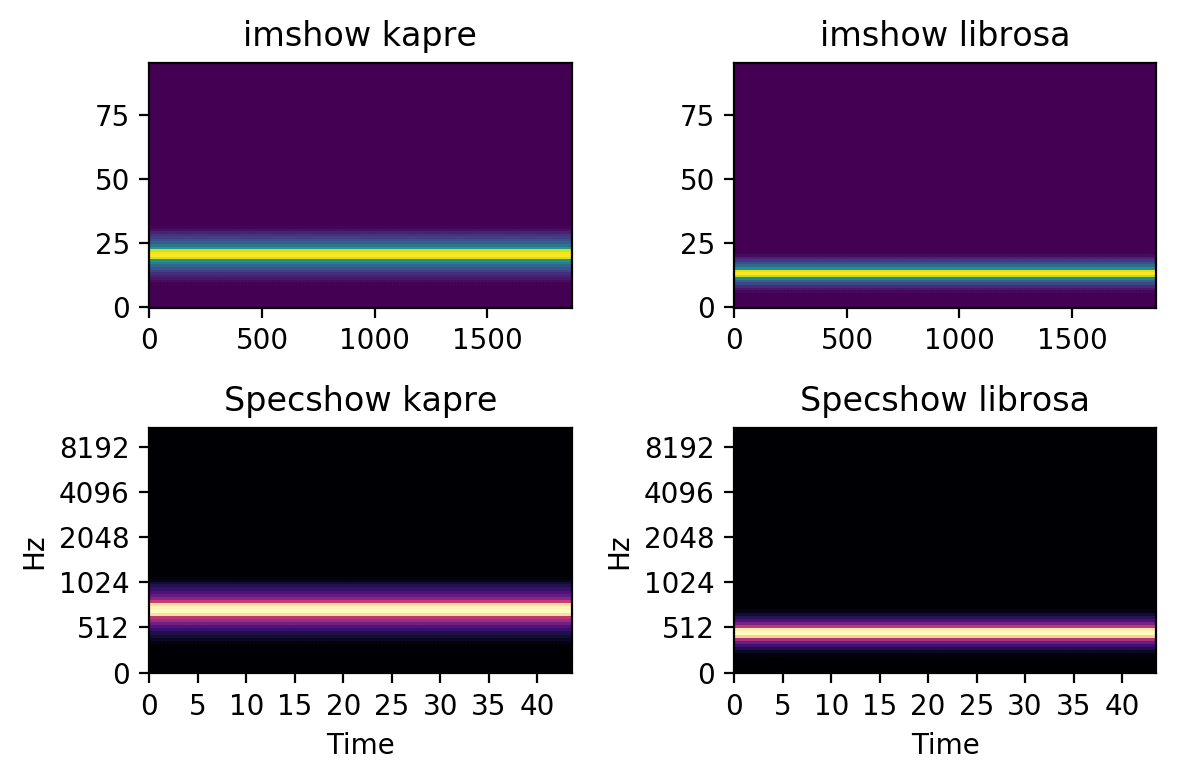

In [4]:
plt.figure(dpi=200)

plt.subplot(2,2,1)
plt.title('imshow kapre')
plt.imshow(kapre_mel, aspect='auto',origin='lower')

plt.subplot(2,2,2)
plt.title('imshow librosa')
plt.imshow(librosa.power_to_db(librosa_mel), aspect='auto',origin='lower')

plt.subplot(2,2,3)
plt.title('Specshow kapre')
specshow(kapre_mel, y_axis='mel',x_axis='time')

plt.subplot(2,2,4)
plt.title('Specshow librosa')
specshow(librosa.power_to_db(librosa_mel, ref=np.max),y_axis='mel',x_axis='time')

plt.tight_layout()